#  Do It Yourself Analysis

What happens if you do the above analysis with another training set? Show and explain.

In [37]:
import numpy as np      
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline   

df_iris = pd.read_csv("..\ML\Week 3\ML02_Iris.data")
df_iris['Label'] = df_iris['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2})


# Get from the dataframe only the first two features, it is common practice to call this X (the independent variables)
X = df_iris[['Sepal Length','Sepal Width']] 

# Get from the dataframe the just created label variable, usually called y (the target class that you want to predict)
y = df_iris['Label']

# Split the dataset into a training and a testing set; test set will be the 25% taken randomly
# I changed the amount of test data to 10% and changed the random_state to a different number.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=44)

# Standarize the features
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train[:5,:]

array([[-1.5151887 ,  0.10410014],
       [ 2.18819949, -0.12256952],
       [ 1.07718304,  0.10410014],
       [-0.77451106,  2.37079666],
       [ 0.83029049,  0.33076979]])

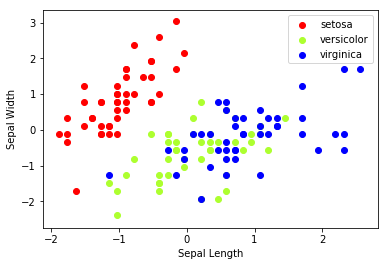

In [38]:
#Plot the training data
colors = ('red', 'greenyellow', 'blue')
for i in range(len(colors)):
    x1s = X_train[:, 0][y_train.as_matrix() == i]
    x2s = X_train[:, 1][y_train.as_matrix() == i]
    plt.scatter(x1s, x2s, c=colors[i])

plt.legend(['setosa', 'versicolor', 'virginica'])   # maintain order from dataset preparation!
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])

In [39]:
# Create the linear model classifier
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
# Fit (=train) the classifier
clf.fit(X_train, y_train)

# Print the 'learned' coeficients
print(clf.coef_)
print(clf.intercept_)

[[-28.15355069  22.50748709]
 [ -2.01018755  -1.97592467]
 [  5.36414179  -4.68404477]]
[-24.50796485  -8.72086436  -9.5484394 ]


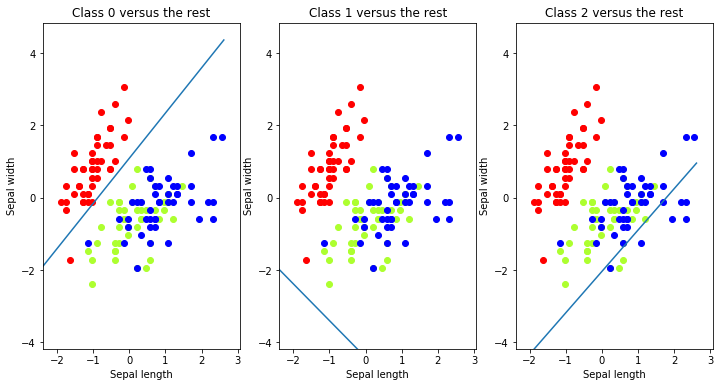

In [40]:
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xs = np.arange(x_min, x_max, 0.5)
colors = ('red', 'greenyellow', 'blue')

fig, axes = plt.subplots(1, 3, sharex=True)
fig.set_size_inches(12,6)

for i in [0,1,2]:     # for each single class against two other classes
    axes[i].set_title('Class ' + str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_aspect('equal')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    for j in range(len(colors)):
        px = X_train[:, 0][y_train.as_matrix() == j]
        py = X_train[:, 1][y_train.as_matrix() == j]
        
        axes[i].scatter(px, py, c=colors[j])
    ys = (-clf.intercept_[i] - xs * clf.coef_[i,0]) / clf.coef_[i,1]
    axes[i].plot(xs,ys)

In [41]:
print(clf.predict(scaler.transform([[4.7, 3.1]]))[0])

0


In [42]:
from sklearn import metrics
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.866666666667


By using less test data and more training data and using a different random state, the predictions is more accurate. It was 0.71 and now it is 0.87

Pick 2 other features (motivate your choice) and repeat the above analysis. Include the plots as well. Show all 4 steps (split train and test set, normalize, compute hyperplane, evaluate theperformance with test set). Is the prediction power of these other 2 features better or worse?    

For my features I choose padel width and pedal length. The reason for this is because I created a scatter matrix of the dataset. If you look at the matrix you can see a few options that are very viable for a linair model, patal width and length are the best combination, other combinations which seem quite acurate on the scatter plot are Sepal length + Petal length and Petal width + Sepal length

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

%matplotlib inline   

df_iris = pd.read_csv("..\ML\Week 3\ML02_Iris.data")
df_iris['Label'] = df_iris['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2})


# Get from the dataframe only the first two features, it is common practice to call this X (the independent variables)
X = df_iris[['Petal Length','Petal Width']] 

# Get from the dataframe the just created label variable, usually called y (the target class that you want to predict)
y = df_iris['Label']

# Split the dataset into a training and a testing set; test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44)


<b> Normalize </b>

In [49]:
from sklearn.preprocessing import StandardScaler

# Standarize the features
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train[:5,:]



array([[ 0.65316898,  0.76705728],
       [ 0.02252307, -0.1510693 ],
       [-1.23876876, -0.806874  ],
       [-1.35343165, -1.20035682],
       [ 0.99715766,  1.1605401 ]])

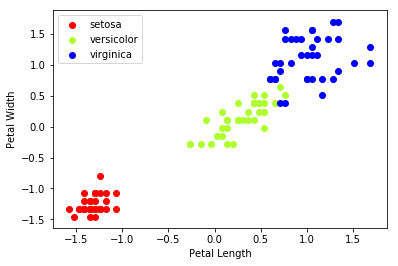

In [51]:
#Plot the training data
colors = ('red', 'greenyellow', 'blue')
for i in range(len(colors)):
    x1s = X_train[:, 0][y_train.as_matrix() == i]
    x2s = X_train[:, 1][y_train.as_matrix() == i]
    plt.scatter(x1s, x2s, c=colors[i])

plt.legend(['setosa', 'versicolor', 'virginica'])   # maintain order from dataset preparation!
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])

In [86]:
# Create the linear model classifier
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
# Fit (=train) the classifier
clf.fit(X_train, y_train)

# Print the 'learned' coeficients
print(clf.coef_)
print(clf.intercept_)

[[ -6.76388138  -9.96807518]
 [ 16.40405405 -29.31831005]
 [ 16.70613031  19.01971843]]
[-10.          -8.68143278 -33.89660724]


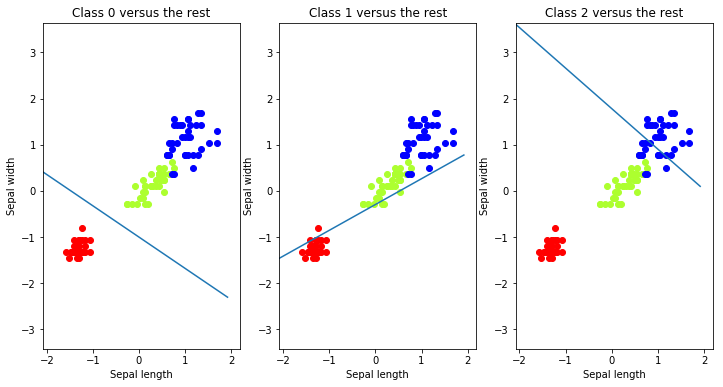

In [87]:
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xs = np.arange(x_min, x_max, 0.5)
colors = ('red', 'greenyellow', 'blue')

fig, axes = plt.subplots(1, 3, sharex=True)
fig.set_size_inches(12,6)

for i in [0,1,2]:     # for each single class against two other classes
    axes[i].set_title('Class ' + str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_aspect('equal')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    for j in range(len(colors)):
        px = X_train[:, 0][y_train.as_matrix() == j]
        py = X_train[:, 1][y_train.as_matrix() == j]
        
        axes[i].scatter(px, py, c=colors[j])
    ys = (-clf.intercept_[i] - xs * clf.coef_[i,0]) / clf.coef_[i,1]
    axes[i].plot(xs,ys)

In [88]:
from sklearn import metrics
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.947368421053


I think the result speaks for itself but because the question was "Is the prediction power of these other 2 features better or worse?", the prediction is <b>better</b>

# 3. Can you also do this analysis with 3 or 4 features? Does the accuracy improve?

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import SGDClassifier

%matplotlib inline   

df_iris = pd.read_csv("..\ML\Week 3\ML02_Iris.data")
df_iris['Label'] = df_iris['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2})


# Get from the dataframe only the first two features, it is common practice to call this X (the independent variables)
X = df_iris[['Petal Length','Petal Width','Sepal Length','Petal Length']] 

# Get from the dataframe the just created label variable, usually called y (the target class that you want to predict)
y = df_iris['Label']

# Split the dataset into a training and a testing set; test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44)

# Standarize the features
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Create the linear model classifier
clf = SGDClassifier()
# Fit (=train) the classifier
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.921052631579


It does <b>not improve</b> the accuracy. I personally think it is because the petal length and petal width are already very clear and the only thing thats missing to have a higher accuracy score is more test data

# Try a quadratic model with petal length and width! 

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.qda import QDA
import numpy as np
%matplotlib inline   

df_iris = pd.read_csv("..\ML\Week 3\ML02_Iris.data")
df_iris['Label'] = df_iris['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2})


# Get from the dataframe only the first two features, it is common practice to call this X (the independent variables)
X = df_iris[['Petal Length','Petal Width']] 

# Get from the dataframe the just created label variable, usually called y (the target class that you want to predict)
y = df_iris['Label']

# Split the dataset into a training and a testing set; test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44)

# Standarize the features
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Create QDA classifier
clf = QDA()
# Fit (=train) the classifier
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))


0.973684210526


The accuracy is <b>really good</b> and improved from the linear classifier